## APS2 - TRANSFERÊNCIA DE CALOR E MECÂNICA DOS SÓLIDOS
Grupo: Fernando Fincatti, Gabriela Moreno, Lais Nascimento, Theo Barbara;

---

### Importando as bibliotecas
---

In [37]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

### Declarando varíaveis
---

In [38]:
n = 2              #nº do grupo
k = 1              #m^2/s
alpha = 1          #m/s
T = 3              #s
Q = 100            #kg/ms
lx = 30            #m
ly = 20            #m
a = int(n/1.4)     #xxx
b = int(60/(n+5))  #xxx
tempo = 10*T       #s
delta_t = 1e-3     #s
delta_x = 1        #m
delta_y = delta_x  #m

In [39]:
k = 1              
alpha = 1          
T = 2             
Q = 80           
lx = 30            
ly = 30           
a = 15   
b = 15        
tempo = 5       
delta_t = 0.05     
delta_x = 0.5       
delta_y = delta_x  

In [40]:
#teste de convergência
(delta_t/delta_x**2) < (1/4*k)

True

In [80]:
#número de nós em x
dimensao_x = int((lx/delta_x)) + 1

#número de nós em y
dimensao_y = int((ly/delta_y)) + 1

#steps no tempo
dimensao_z = int(tempo/delta_t) +5

print("Dimensão x: {0}\nDimensão y: {1}\nDimensão z: {2}".format(dimensao_x,dimensao_y,dimensao_z))

Dimensão x: 61
Dimensão y: 61
Dimensão z: 105


## Funções de auxílio
---

In [81]:
def equacao_concentracao(x, y, c_mais_i_ant, c_menos_i_ant, c_mais_j_ant, c_menos_j_ant, c_ij_ant, t):
    
    #calcula o primeiro termo
    primeiro_termo = -1*(c_mais_i_ant - c_menos_i_ant)/(2*delta_x)
    
    #calcula o segundo termo
    segundo_termo = 0*(c_mais_j_ant - c_menos_j_ant)/(2*delta_y)
    
    #calcula o terceiro termo
    terceiro_termo = k*(c_mais_i_ant - 2*c_ij_ant + c_menos_i_ant)/(delta_x**2)
    
    #calcula o quarto termo
    quarto_termo = k*(c_mais_j_ant - 2*c_ij_ant + c_menos_j_ant)/(delta_y**2)
    
    # Para a posição (a,b) para tempos menores de 3 segundos tem derramamento Q. !=0
    if x == a*2 and y == b*2 and t < T/delta_t:
        quinto_termo = Q/(delta_x*delta_y)
    
    # Se não obdece essas condições tem que desconsiderar o quinto termo que colocamos na função?
    else:
        quinto_termo = 0
    
    #calcula a resposta final
    resposta = delta_t*(primeiro_termo + segundo_termo + terceiro_termo + quarto_termo + quinto_termo) + c_ij_ant
    
    return resposta

In [87]:
def calculo (rio):
    tempo_atual = 1  #tempo
    i = 1            #linhas
    j = 0            #colunas

    while(tempo_atual < dimensao_z):

        i = 1 #reinicia as colunas

        while(i < dimensao_x-1):

            j = 1 #reinicia as linhas

            #terceira condição de contorno
            rio[0, i, tempo_atual] = rio[1, i, tempo_atual]

            #quarta condição de contorno
            rio[dimensao_y-1, i, tempo_atual] = rio[dimensao_y-2, i, tempo_atual]

            while(j < dimensao_y-1):

                #primeira condição de contorno
                rio[j, 0, tempo_atual] = rio[j, 1, tempo_atual]

                #segunda condição de contorno
                rio[j, dimensao_x-1, :] = rio[j, dimensao_x-2, tempo_atual]

                #calcula dispersão do poluente
                rio[j, i, tempo_atual] = equacao_concentracao(j, i, rio[j, i+1, tempo_atual-1], rio[j, i-1, tempo_atual-1], rio[j+1, i, tempo_atual-1], rio[j-1, i, tempo_atual-1], rio[j, i, tempo_atual-1], tempo_atual)

                j += 1
            i += 1
        tempo_atual += 1
    

## Inicializando a placa
---

In [82]:
#inicializa as condições do rio
rio = np.zeros((dimensao_x, dimensao_y, dimensao_z))

In [83]:
rio;

## Calculando a temperatura
---

In [88]:
calculo(rio)

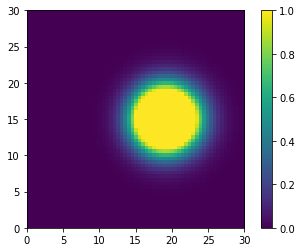

In [89]:
plt.imshow(rio[:,:,dimensao_z-1], vmin=0, vmax=1, extent=(0,30,0,30))
plt.colorbar()
plt.show()

In [90]:
rio[40][40][dimensao_z-1]

0.6274717825443064

## A influência do coeficiente de difusão K no transporte

### Para K menor

In [92]:
k=0.5

In [93]:
#inicializa as condições 
k_menor = np.zeros((dimensao_x, dimensao_y, dimensao_z))

In [94]:
calculo(k_menor)

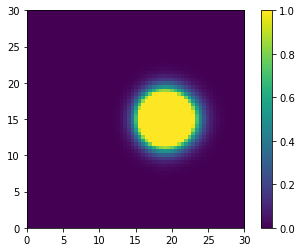

In [95]:
plt.imshow(k_menor[:,:,dimensao_z-1], vmin=0, vmax=1, extent=(0,30,0,30))
plt.colorbar()
plt.show()

Ao observar a imagem acima, que foi contruida com o cáculo da difusão de um poluente em um rio com correnteza com um valor de  coeficiente de difusão K menor do que o usado anteriormente na APS percebemos que o transporte desse poluente para o restante do rio é menor, ele fica mais concentrado na região em que houve o derramamento.

### Para K maior 

In [119]:
k = 1.3

In [120]:
#inicializa as condições 
k_maior = np.zeros((dimensao_x, dimensao_y, dimensao_z))

In [121]:
calculo(k_maior)

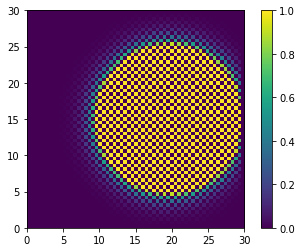

In [122]:
plt.imshow(k_maior[:,:,dimensao_z-1], vmin=0, vmax=1, extent=(0,30,0,30))
plt.colorbar()
plt.show()

Ao observar a imagem acima, que foi contruida com o cáculo da difusão de um poluente em um rio com correnteza com um valor de  coeficiente de difusão K maio do que o usado anteriormente na APS percebemos que há uma difusão bem maior do que antes, o poluente já não está mais com uma contração tão alta em um determinado ponto apenas, grande parte do rio já está contaminado.

## Primeira Fronteira a ser atingida 

In [1]:
# Tem que fazer um while que passa só pelas bordas e marcar em qual borda aparece o valor diferente de 0 primeiro